<a href="https://colab.research.google.com/github/arunimamuralitharan/mlprojects/blob/main/neural_net_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple

np.random.seed(42)

class Neural:

    def __init__(self, layers: List[int], epochs: int,
                 learning_rate: float = 0.001, batch_size: int=32,
                 validation_split: float = 0.2, verbose: int=1):
        self._layer_structure: List[int] = layers
        self._batch_size: int = batch_size
        self._epochs: int = epochs
        self._learning_rate: float = learning_rate
        self._validation_split: float = validation_split
        self._verbose: int = verbose
        self._losses: Dict[str, float] = {"train": [], "validation": []}
        self._is_fit: bool = False
        self.__layers = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        # validation split
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        # initialization of layers
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                # forward pass
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                # calculate loss
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                #backward
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds,y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
        return

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self._is_fit == False:
            raise Exception("Model has not been trained yet.")
        pred, hidden = self.__forward(X)
        return pred

    def plot_learning(self) -> None:
        plt.plot(self._losses["train"],label="loss")
        plt.plot(self._losses["validation"],label="validation")
        plt.legend()

    def __init_layers(self) -> List[np.ndarray]:
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1,self._layer_structure[i]))
            ])
        return layers

    def __forward(self, batch: np.ndarray) -> Tuple[np.ndarray, List[np.ndarray]]:
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            # store the forward pass hidden values for use in backprop
            hidden.append(batch.copy())
        return batch, hidden

    def __calculate_loss(self,actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        "mse"
        return predicted - actual


    def __calculate_mse(self, actual: np.ndarray, predicted: np.ndarray) -> np.ndarray:
        return (actual - predicted) ** 2

    def __backward(self, hidden: List[np.ndarray], grad: np.ndarray) -> None:
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)

            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate

            grad = grad @ self.__layers[i][0].T
        return

In [7]:
def generate_data():
    # define correlation values
    corr_a = 0.6
    corr_b = 0.2
    corr_c = -0.5

    # generate independent features
    a = np.random.normal(0, 1, size=100000)
    b = np.random.normal(0, 1, size=100000)
    c = np.random.normal(0, 1, size=100000)
    d = np.random.randint(0, 4, size=100000)
    e = np.random.binomial(1, 0.5, size=100000)

    # generate target feature based on independent features
    target = 50 + corr_a*a + corr_b*b + corr_c*c + d*10 + 20*e + np.random.normal(0, 10, size=100000)

    # create dataframe with all features
    df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e, 'target': target})
    return df

Epoch: 0 Train MSE: 6062.3206205749575 Valid MSE: 5631.0737072351785
Epoch: 1 Train MSE: 5866.306096123896 Valid MSE: 5384.240748392434
Epoch: 2 Train MSE: 5580.556680419229 Valid MSE: 4994.427907929647
Epoch: 3 Train MSE: 5124.161497404786 Valid MSE: 4377.562635667046
Epoch: 4 Train MSE: 4405.953911755627 Valid MSE: 3472.871360169871
Epoch: 5 Train MSE: 3369.563557006041 Valid MSE: 2336.5070037222968
Epoch: 6 Train MSE: 2113.682207963623 Valid MSE: 1248.7909982909491
Epoch: 7 Train MSE: 1003.5176154764339 Valid MSE: 568.2722197838694
Epoch: 8 Train MSE: 398.4459847420131 Valid MSE: 299.69175143855773
Epoch: 9 Train MSE: 198.84190033315383 Valid MSE: 205.5391262886992
Epoch: 10 Train MSE: 139.4828922968463 Valid MSE: 162.44549960761748
Epoch: 11 Train MSE: 114.06247776792617 Valid MSE: 138.61028465676657
Epoch: 12 Train MSE: 100.2531348985442 Valid MSE: 124.76054796405637
Epoch: 13 Train MSE: 92.3871507397595 Valid MSE: 116.65651722705783
Epoch: 14 Train MSE: 87.91223754639039 Valid MS

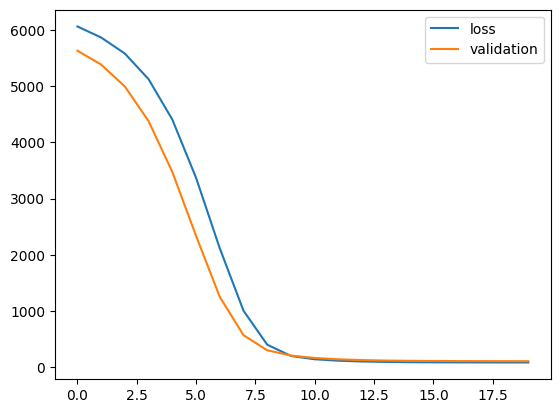

In [8]:
df = generate_data()

# separate the features and target
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

layer_structure = [X_train.shape[1],10,10,1]
nn = Neural(layer_structure, 20, 1e-5, 64, 0.2, 1)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Test error: ",mean_squared_error(y_test, y_pred))